# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset::https://www.kaggle.com/datasets/tunguz/inpatient-prospective-payment-system-ipps


Import the necessary libraries and create your dataframe(s).

In [1]:
# import libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# read csv file 
df=pd.read_csv("Inpatient_Prospective_Payment_System__IPPS__Provider.csv")
print(df.shape)
df.info()#print dataframe  columns ,no-null values ,count and datatype of dataset.



(163065, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   DRG Definition                        163065 non-null  object 
 1   Provider Id                           163065 non-null  int64  
 2   Provider Name                         163065 non-null  object 
 3   Provider Street Address               163065 non-null  object 
 4   Provider City                         163065 non-null  object 
 5   Provider State                        163065 non-null  object 
 6   Provider Zip Code                     163065 non-null  int64  
 7   Hospital Referral Region Description  163065 non-null  object 
 8    Total Discharges                     163065 non-null  int64  
 9    Average Covered Charges              163065 non-null  float64
 10   Average Total Payments               163065 non-null  

## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [2]:
# looking for missing values in dataset.
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{}- {}%'.format(col,round(pct_missing*100)))
    print(df.shape)

DRG Definition- 0%
(163065, 12)
Provider Id- 0%
(163065, 12)
Provider Name- 0%
(163065, 12)
Provider Street Address- 0%
(163065, 12)
Provider City- 0%
(163065, 12)
Provider State- 0%
(163065, 12)
Provider Zip Code- 0%
(163065, 12)
Hospital Referral Region Description- 0%
(163065, 12)
 Total Discharges - 0%
(163065, 12)
 Average Covered Charges - 0%
(163065, 12)
 Average Total Payments - 0%
(163065, 12)
Average Medicare Payments- 0%
(163065, 12)


(163065, 12)


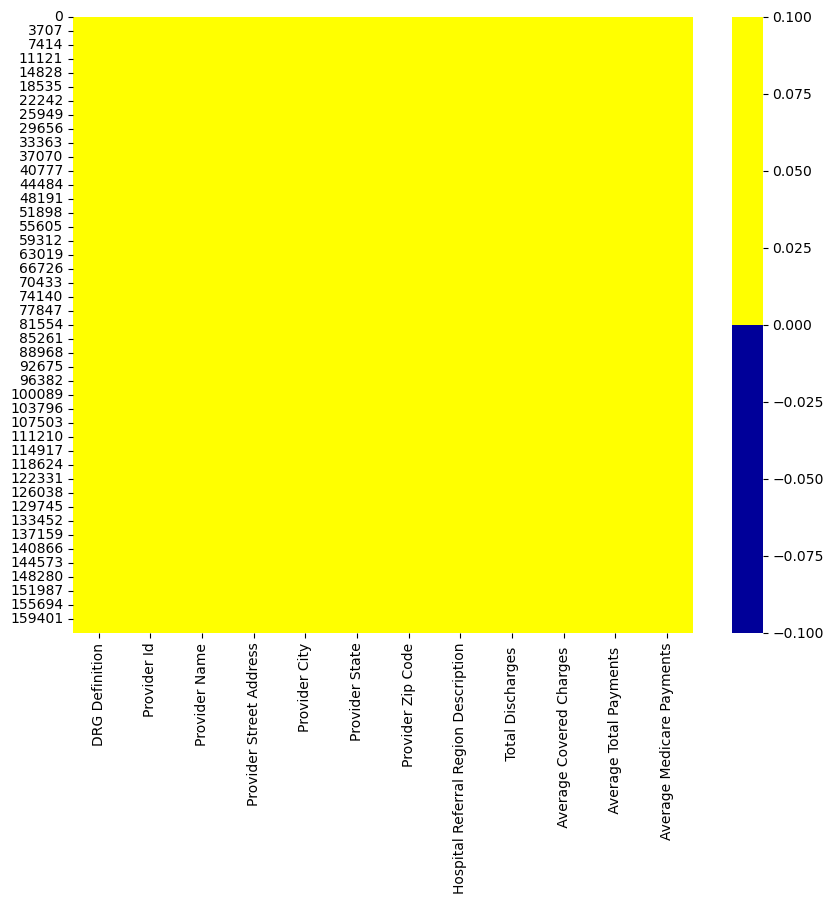

In [3]:
# showing missing value through heat map.
plt.figure(figsize=(10,8))

cols = df.columns[:30]
colours = ['#000099', '#ffff00'] # specify colours: yellow - missing. blue - not missing
sns.heatmap(df[cols].isna(), cmap=sns.color_palette(colours))
print(df.shape)

Observation: there are no missing values in the dataset.

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

In [4]:
# knowing data types of given attributes in the dataset.
df.dtypes

DRG Definition                           object
Provider Id                               int64
Provider Name                            object
Provider Street Address                  object
Provider City                            object
Provider State                           object
Provider Zip Code                         int64
Hospital Referral Region Description     object
 Total Discharges                         int64
 Average Covered Charges                float64
 Average Total Payments                 float64
Average Medicare Payments               float64
dtype: object

In [5]:
#Identifying Outliers in Numeric columns using IQR (Inter Quartile Range) and Q1 (25% Quantile), Q3(75% Quantile).
num_columns = ['Provider Id', 'Provider Zip Code',' Total Discharges ', ' Average Covered Charges ', ' Average Total Payments ','Average Medicare Payments']

def identify_outliers(col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5*iqr
    upper_limit = q3 + 1.5*iqr
    return(col, q1, q3, iqr, lower_limit, upper_limit)


#Checking for Outliers and identifying them by calling identify_outliers() function.
#observations below Q1- 1.5*IQR, or those above Q3 + 1.5*IQR  are defined as outliers.
for col in num_columns :
    col, q1, q3, iqr, lower_limit, upper_limit = identify_outliers(col)
    print("\nColumn name : {}\n Q1 = {} \n Q3 = {}\n IQR = {}".format(col, q1, q3, iqr))
    print(" Lower limit = {}\n Upper limit = {}\n".format(lower_limit, upper_limit))
    outlier_count = len(df.loc[(df[col] < lower_limit) | (df[col] > upper_limit)])
    if outlier_count != 0 :
        print(outlier_count, "OUTLIERS ARE PRESENT in {} column.".format(col))
        print("Outlier datapoints in {} column are:".format(col))
        print(np.array(df.loc[(df[col] < lower_limit) | (df[col] > upper_limit)][col]))
    else:
        print("OUTLIERS ARE NOT PRESENT in {} column\n".format(col))



Column name : Provider Id
 Q1 = 110092.0 
 Q3 = 380075.0
 IQR = 269983.0
 Lower limit = -294882.5
 Upper limit = 785049.5

OUTLIERS ARE NOT PRESENT in Provider Id column


Column name : Provider Zip Code
 Q1 = 27261.0 
 Q3 = 72901.0
 IQR = 45640.0
 Lower limit = -41199.0
 Upper limit = 141361.0

OUTLIERS ARE NOT PRESENT in Provider Zip Code column


Column name :  Total Discharges 
 Q1 = 17.0 
 Q3 = 49.0
 IQR = 32.0
 Lower limit = -31.0
 Upper limit = 97.0

13251 OUTLIERS ARE PRESENT in  Total Discharges  column.
Outlier datapoints in  Total Discharges  column are:
[135 139 103 ... 114 110 114]

Column name :  Average Covered Charges 
 Q1 = 15947.16 
 Q3 = 43232.59
 IQR = 27285.429999999997
 Lower limit = -24980.984999999997
 Upper limit = 84160.73499999999

11772 OUTLIERS ARE PRESENT in  Average Covered Charges  column.
Outlier datapoints in  Average Covered Charges  column are:
[ 98388.77 105929.47  85165.1  ... 151508.42 109602.05  84846.5 ]

Column name :  Average Total Payments 


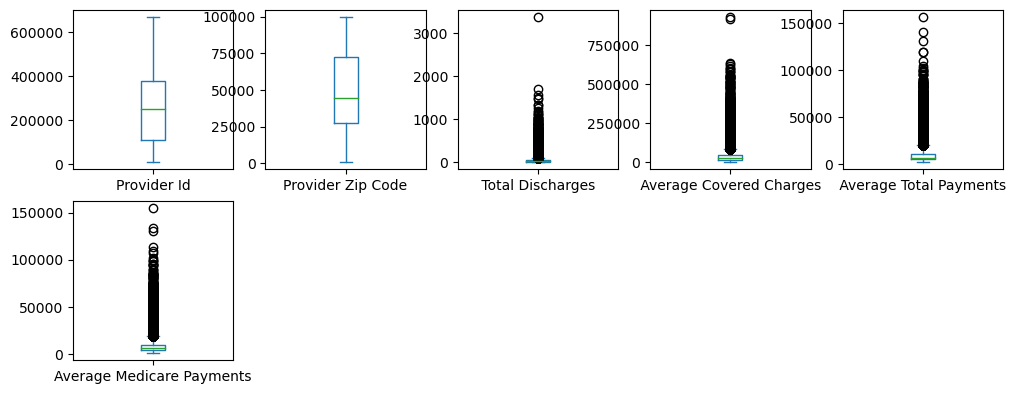

In [7]:
# looking for the outliers  clearly i used box plot distrubtion across  the datset.
# numerical columns
num_columns = ['Provider Id', 'Provider Zip Code',' Total Discharges ', ' Average Covered Charges ', ' Average Total Payments ','Average Medicare Payments']

ax_array = df.plot(kind="box", subplots=True, figsize=(12, 12), layout=(5, 5))
plt.show()

Observations:
.There are huge number of outliers in Total Payments, Average_Covered_Charges, Average_Total_Payments, Average_Medicare_Payments columns .All these outliers are more than the maximum value and so, Q3 is also greater than maximum value .
.All these outliers are more than the maximum value and so, Q3 is also greater than maximum value 
.The datset is highly right skewed with all outliers having very high values.



Text(0.5, 0.98, 'Quantitative Variable Distributions')

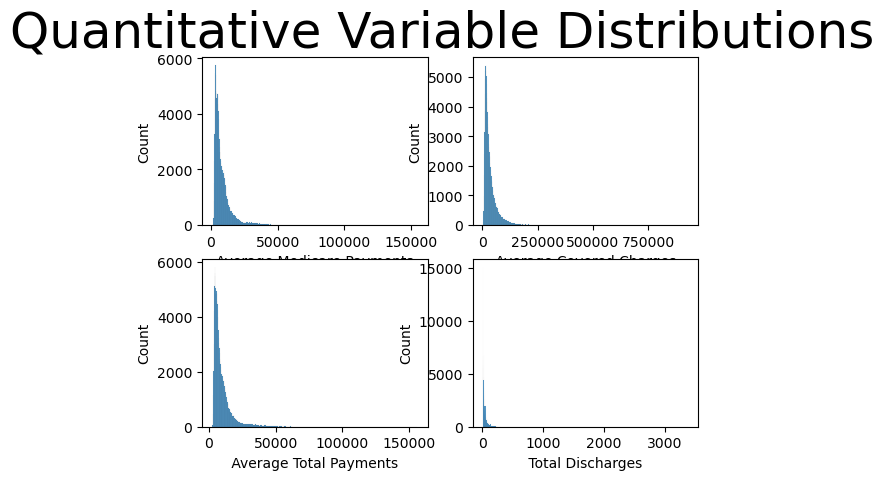

In [10]:
# checking outliers through histplots for quantitative variable distributions  across data.
fig  = plt.figure()

sns.histplot(df['Average Medicare Payments'], kde=False,  ax = fig.add_subplot(221))
sns.histplot(df[' Average Covered Charges '], kde=False,  ax = fig.add_subplot(222))
sns.histplot(df[' Average Total Payments '], kde=False,  ax = fig.add_subplot(223))
sns.histplot(df[' Total Discharges '], kde=False,  ax = fig.add_subplot(224))
fig.suptitle("Quantitative Variable Distributions", fontsize=36)


1.We notice that the data is highly right skewed. After all, not everyone has 4000 discharges and over $50000 in medicare payments! One thing that we can do is to check if it is distributed exponentially by taking the log of each graph. 
2. histplots of columns show that the columns Total_Discharges, Average_Covered_Charges, Average_Total_Payments, Average_Medicare_Payments extremely right skewed with long tails to the right side of the distribution.For all these columns, the mean is greater than the median.
3.We need to check if the distribution changes exponentially.

Text(0.5, 0.98, 'Quantitative Variable Distributions after log transform')

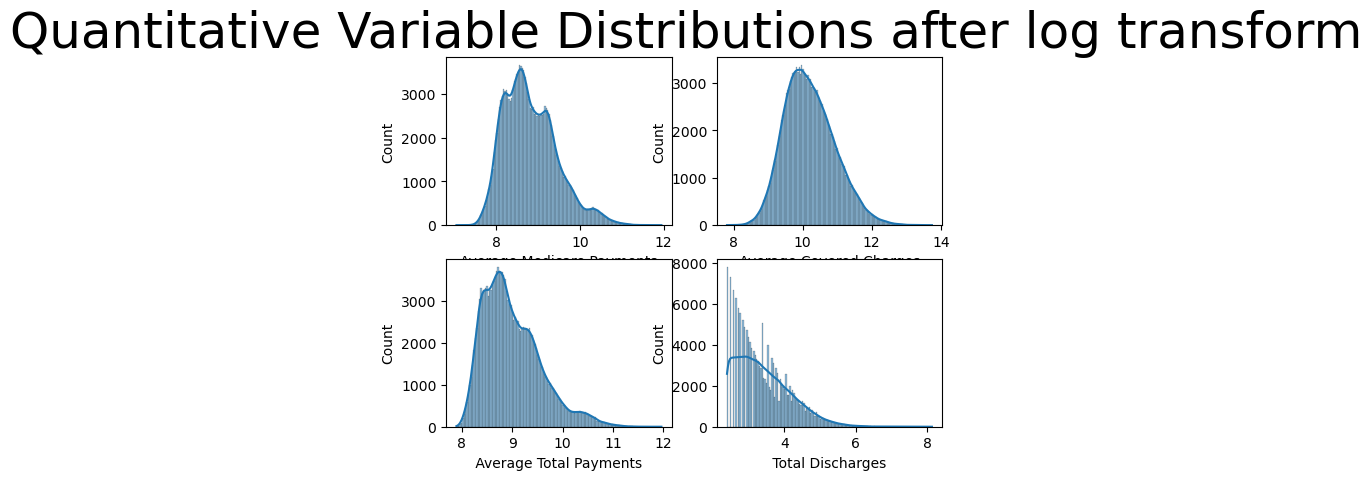

In [11]:
fig  = plt.figure()

sns.histplot(np.log(df['Average Medicare Payments']), kde=True, ax = fig.add_subplot(221))
sns.histplot(np.log(df[' Average Covered Charges ']), kde=True, ax = fig.add_subplot(222))
sns.histplot(np.log(df[' Average Total Payments ']), kde=True, ax = fig.add_subplot(223))
sns.histplot(np.log(df[' Total Discharges ']), kde=True, ax = fig.add_subplot(224))
fig.suptitle("Quantitative Variable Distributions after log transform", fontsize=36)


Observation: 
    .The data is normally distributed for columns with outliers after converting to logarthmic values and taking an Exponential Distribution .further,We need to use Z-score scaling, standard or MinMax scaling to regress the data

In [12]:
# checking for duplicates and dropping duplicates which  may srew  up the analysis.
df.drop_duplicates()

DRG Definition  Provider Id  \
0       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10001   
1       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10005   
2       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10006   
3       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10011   
4       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10016   
...                                          ...          ...   
163060            948 - SIGNS & SYMPTOMS W/O MCC       670041   
163061            948 - SIGNS & SYMPTOMS W/O MCC       670055   
163062            948 - SIGNS & SYMPTOMS W/O MCC       670056   
163063            948 - SIGNS & SYMPTOMS W/O MCC       670060   
163064            948 - SIGNS & SYMPTOMS W/O MCC       670068   

                                          Provider Name  \
0                      SOUTHEAST ALABAMA MEDICAL CENTER   
1                         MARSHALL MEDICAL CENTER SOUTH   
2                        ELIZA COFFEE MEMORIAL HOSPITAL   
3                                     ST VINCENT'S EAST   
4                         SHELBY BAPTIST MEDICAL CENTER   
...                                                 ...   
163060                  SETON MEDICAL CENTER WILLIAMSON   
163061                     METHODIST STONE OAK HOSPITAL   
163062                        SETON MEDICAL CENTER HAYS   
163063       TEXAS REGIONAL MEDICAL CENTER AT SUNNYVALE   
163064  TEXAS HEALTH PRESBYTERIAN HOSPITAL FLOWER MOUND   

           Provider Street Address Provider City Provider State  \
0           1108 ROSS CLARK CIRCLE        DOTHAN             AL   
1       2505 U S HIGHWAY 431 NORTH          BOAZ             AL   
2               205 MARENGO STREET      FLORENCE             AL   
3       50 MEDICAL PARK EAST DRIVE    BIRMINGHAM             AL   
4          1000 FIRST STREET NORTH     ALABASTER             AL   
...                            ...           ...            ...   
163060           201 SETON PARKWAY    ROUND ROCK             TX   
163061        1139 E SONTERRA BLVD   SAN ANTONIO             TX   
163062              6001 KYLE PKWY          KYLE             TX   
163063      231 SOUTH COLLINS ROAD     SUNNYVALE             TX   
163064      4400 LONG PRAIRIE ROAD  FLOWER MOUND             TX   

        Provider Zip Code Hospital Referral Region Description  \
0                   36301                          AL - Dothan   
1                   35957                      AL - Birmingham   
2                   35631                      AL - Birmingham   
3                   35235                      AL - Birmingham   
4                   35007                      AL - Birmingham   
...                   ...                                  ...   
163060              78664                          TX - Austin   
163061              78258                     TX - San Antonio   
163062              78640                          TX - Austin   
163063              75182                          TX - Dallas   
163064              75028                          TX - Dallas   

         Total Discharges    Average Covered Charges   \
0                       91                   32963.07   
1                       14                   15131.85   
2                       24                   37560.37   
3                       25                   13998.28   
4                       18                   31633.27   
...                    ...                        ...   
163060                  23                   26314.39   
163061                  11                   21704.72   
163062                  19                   39121.73   
163063                  11                   28873.09   
163064                  12                   15042.00   

         Average Total Payments   Average Medicare Payments  
0                        5777.24                    4763.73  
1                        5787.57                    4976.71  
2                        5434.95                    4453.79  
3            

there are no duplicate rows in data.

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

i would  like  to use every single column in data for further analysis and its  visualization...so. there is no unnecesary data i ndaatset



## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [14]:
# remove the white spaces in columns.
print(df.columns)
df.columns.str.strip()

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       ' Total Discharges ', ' Average Covered Charges ',
       ' Average Total Payments ', 'Average Medicare Payments'],
      dtype='object')


Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       'Total Discharges', 'Average Covered Charges', 'Average Total Payments',
       'Average Medicare Payments'],
      dtype='object')

In [16]:
#remove the spaces in columns by'_'.
df.columns=df.columns.str.replace(' ','_')
print(df.columns)

Index(['DRG_Definition', 'Provider_Id', 'Provider_Name',
       'Provider_Street_Address', 'Provider_City', 'Provider_State',
       'Provider_Zip_Code', 'Hospital_Referral_Region_Description',
       '_Total_Discharges_', '_Average_Covered_Charges_',
       '_Average_Total_Payments_', 'Average_Medicare_Payments'],
      dtype='object')


In [17]:
#save cleaned dataset to a new csv
df.to_csv("ipps_cleaned.csv")

In [19]:
# Check to see that it workded
df_cleaned = pd.read_csv("ipps_cleaned.csv")

# Want to see if the dataframe was properly imported and see what kind of data is stored in each column.
df_cleaned.info()
df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 13 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            163065 non-null  int64  
 1   DRG_Definition                        163065 non-null  object 
 2   Provider_Id                           163065 non-null  int64  
 3   Provider_Name                         163065 non-null  object 
 4   Provider_Street_Address               163065 non-null  object 
 5   Provider_City                         163065 non-null  object 
 6   Provider_State                        163065 non-null  object 
 7   Provider_Zip_Code                     163065 non-null  int64  
 8   Hospital_Referral_Region_Description  163065 non-null  object 
 9   _Total_Discharges_                    163065 non-null  int64  
 10  _Average_Covered_Charges_             163065 non-null  float64
 11  

Unnamed: 0                            DRG_Definition  Provider_Id  \
0           0  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10001   
1           1  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10005   
2           2  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10006   
3           3  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10011   
4           4  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10016   

                      Provider_Name     Provider_Street_Address Provider_City  \
0  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE        DOTHAN   
1     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH          BOAZ   
2    ELIZA COFFEE MEMORIAL HOSPITAL          205 MARENGO STREET      FLORENCE   
3                 ST VINCENT'S EAST  50 MEDICAL PARK EAST DRIVE    BIRMINGHAM   
4     SHELBY BAPTIST MEDICAL CENTER     1000 FIRST STREET NORTH     ALABASTER   

  Provider_State  Provider_Zip_Code Hospital_Referral_Region_Description  \
0             AL              36301                          AL - Dothan   
1             AL              35957                      AL - Birmingham   
2             AL              35631                      AL - Birmingham   
3             AL              35235                      AL - Birmingham   
4             AL              35007                      AL - Birmingham   

   _Total_Discharges_  _Average_Covered_Charges_  _Average_Total_Payments_  \
0                  91                   32963.07                   5777.24   
1                  14                   15131.85                   5787.57   
2                  24                   37560.37                   5434.95   
3                  25                   13998.28                   5417.56   
4                  18                   31633.27                   5658.33   

   Average_Medicare_Payments  
0                    4763.73  
1                    4976.71  
2                    4453.79  
3                    4129.16  
4                    4851.44

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
yes i find all types of data in my dataset.
2. Did the process of cleaning your data give you new insights into your dataset?
yes i got my insights to find through this dataset.
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?
nope.